In [17]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from astropy.io import fits

from models.deep_set.set_dataloader import CCD



In [10]:
# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))

In [18]:
ccd = CCD()

ra0, dec0, ra1, dec1, ra2, dec2, ra3, dec3 = ccd.get_boundaries()

6


In [106]:
df = pd.read_csv('../../bricks_data/south.csv')
df.head()

df_sum = df
df_sum['gal_sum'] = df.lrg + df.elg + df.qso
df_sum['ra'], df_sum['dec'] = hp.pix2ang(NSIDE,df_sum.pixel_id, lonlat=True)


df_sum.nsmallest(620, columns=['gal_sum', 'exposures'], keep='all')


,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,exptime_z,meansky_g,meansky_r,meansky_z,seeing_g,seeing_r,seeing_z,gal_sum,ra,dec
120203,243514,1,2,1,0.014184,0.008403,0.157626,0.471737,0.387990,0.587900,...,0.658797,4.417495e-10,4.775228e-10,1.218800e-10,0.386418,0.329072,0.403468,4,110.566406,22.346588
93299,497058,1,2,1,0.056738,0.000000,0.195645,0.092509,0.331320,0.600372,...,0.265765,3.322372e-09,3.929238e-10,1.586547e-10,0.479127,0.220733,0.152450,4,326.953125,-15.249383
50403,279806,1,2,2,0.063830,0.012605,0.377000,0.576190,0.687515,0.757864,...,0.676073,1.497289e-10,1.924120e-10,6.460044e-10,0.364937,0.401621,0.543578,5,269.296875,16.801838
72258,407739,1,2,2,0.078014,0.004202,0.496150,0.140942,0.565698,0.582986,...,0.684711,1.750312e-10,3.525112e-10,9.778636e-11,0.386421,0.355475,0.278569,5,245.917969,-2.089372
64113,300283,2,1,2,0.099291,0.008403,0.428776,0.374715,0.665649,0.918092,...,0.516269,1.587417e-10,4.067527e-11,2.195339e-10,0.288621,0.133959,0.330113,5,268.242188,13.708317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127701,239116,9,24,42,0.468085,0.025210,0.289533,0.548384,0.565610,0.626465,...,0.547366,3.022712e-10,3.802302e-10,4.506710e-10,0.415645,0.357524,0.538935,75,4.394531,22.993394
59243,171850,10,31,34,0.475177,0.033613,0.149562,0.045261,0.408068,0.707698,...,0.540196,1.220005e-09,1.117938e-09,3.483812e-10,0.176801,0.172440,0.572585,75,116.191406,34.228866
21968,400591,8,36,32,0.000000,0.138655,0.643411,0.247483,0.513342,0.431718,...,1.000000,2.304401e-10,6.958008e-10,3.227565e-10,0.452071,0.471756,0.410003,76,252.773438,-1.044512
90133,636407,7,33,36,0.042553,0.004202,0.026639,0.051710,0.743445,0.605939,...,0.308955,1.026091e-10,3.718898e-10,9.258423e-11,0.353568,0.232694,0.304681,76,356.835937,-38.111040


In [ ]:
df_objects = pd.read_csv('../../bricks_data/galaxy_catalogue_south.csv',
                       dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})


with open('../../bricks_data/pixel2ccd_256.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [153]:
# Example pixel that is half filled despite CCDs:
large_pixel = 452732


df_LRG = df_objects[df_objects["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)


df_ELG = df_objects[df_objects["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

df_QSO = df_objects[df_objects["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)



In [154]:
LRG_in_sample_pixel = (LRG_pixel_indices == large_pixel)
LRG_ra_sample_pixel = ra_LRG[LRG_in_sample_pixel]
LRG_dec_sample_pixel = dec_LRG[LRG_in_sample_pixel]


ELG_in_sample_pixel = (ELG_pixel_indices == large_pixel)
ELG_ra_sample_pixel = ra_ELG[ELG_in_sample_pixel]
ELG_dec_sample_pixel = dec_ELG[ELG_in_sample_pixel]


QSO_in_sample_pixel = (QSO_pixel_indices == large_pixel)
QSO_ra_sample_pixel = ra_QSO[QSO_in_sample_pixel]
QSO_dec_sample_pixel = dec_QSO[QSO_in_sample_pixel]


#Plotting an individual pixel


Number of CCDs in the given pixel:  106


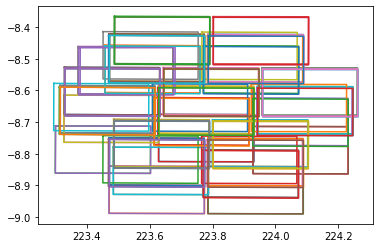

In [155]:
ccds_per_pixel = pixel2ccd_dict[large_pixel]

print("Number of CCDs in the given pixel: ", len(ccds_per_pixel))
for ccd in ccds_per_pixel:
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
        xs = [ra0[ccd],ra1[ccd], ra2[ccd], ra3[ccd],ra0[ccd] ]
        ys = [dec0[ccd],dec1[ccd], dec2[ccd], dec3[ccd],dec0[ccd]]
        plt.plot(xs,ys)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


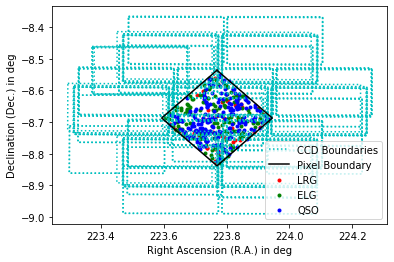

In [156]:
for i, ccd in enumerate(ccds_per_pixel):
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
    xs = [ra0[ccd], ra1[ccd], ra2[ccd], ra3[ccd], ra0[ccd]]
    ys = [dec0[ccd], dec1[ccd], dec2[ccd], dec3[ccd], dec0[ccd]]
    if i == 0:
        plt.plot(xs,ys, "c:", label='CCD Boundaries')
        continue
    plt.plot(xs, ys, "c:")

pixel_boundary = hp.boundaries(nside=NSIDE, pix=large_pixel, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(),lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0],pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1],pixel_boundary_raDec[1][0])


plt.plot(pixel_boundary_raDec[0],pixel_boundary_raDec[1], c='black', label="Pixel Boundary")


plt.scatter(LRG_ra_sample_pixel, LRG_dec_sample_pixel, c='red', marker='.', label="LRG")
plt.scatter(ELG_ra_sample_pixel, ELG_dec_sample_pixel, c='green', marker='.', label="ELG")
plt.scatter(QSO_ra_sample_pixel, QSO_dec_sample_pixel, c='blue', marker='.', label="QSO")

plt.xlabel("Right Ascension (R.A.) in deg")
plt.ylabel("Declination (Dec.) in deg")
#plt.xlim(223.35, 224.1)
#plt.ylim(-8.9, -8.4)

plt.legend()
plt.savefig(f"report_fig/pixel_high_dense_{large_pixel}.eps", bbox_inches='tight', format='eps', dpi=1200)

plt.show()

In [157]:
print(len(LRG_ra_sample_pixel) + len(ELG_ra_sample_pixel) + len(QSO_ra_sample_pixel))

423


In [148]:

small_pixel = 642539

# Half filled example pixel 641441

df_LRG = df_objects[df_objects["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)


df_ELG = df_objects[df_objects["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

df_QSO = df_objects[df_objects["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)



In [149]:
LRG_in_sample_pixel = (LRG_pixel_indices == small_pixel)
LRG_ra_sample_pixel = ra_LRG[LRG_in_sample_pixel]
LRG_dec_sample_pixel = dec_LRG[LRG_in_sample_pixel]


ELG_in_sample_pixel = (ELG_pixel_indices == small_pixel)
ELG_ra_sample_pixel = ra_ELG[ELG_in_sample_pixel]
ELG_dec_sample_pixel = dec_ELG[ELG_in_sample_pixel]


QSO_in_sample_pixel = (QSO_pixel_indices == small_pixel)
QSO_ra_sample_pixel = ra_QSO[QSO_in_sample_pixel]
QSO_dec_sample_pixel = dec_QSO[QSO_in_sample_pixel]


#Plotting an individual pixel


Number of CCDs in the given pixel:  14


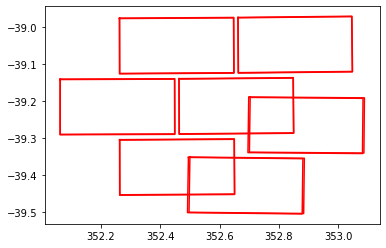

In [150]:
ccds_per_pixel = pixel2ccd_dict[small_pixel]

print("Number of CCDs in the given pixel: ", len(ccds_per_pixel))
for ccd in ccds_per_pixel:
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
        xs = [ra0[ccd],ra1[ccd], ra2[ccd], ra3[ccd],ra0[ccd] ]
        ys = [dec0[ccd],dec1[ccd], dec2[ccd], dec3[ccd],dec0[ccd]]
        plt.plot(xs,ys,"r")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


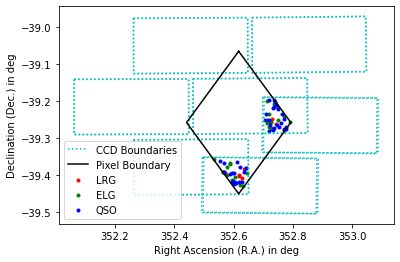

In [151]:
for i, ccd in enumerate(ccds_per_pixel):
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
    xs = [ra0[ccd], ra1[ccd], ra2[ccd], ra3[ccd], ra0[ccd]]
    ys = [dec0[ccd], dec1[ccd], dec2[ccd], dec3[ccd], dec0[ccd]]
    if i == 0:
        plt.plot(xs,ys, "c:", label='CCD Boundaries')
        continue
    plt.plot(xs, ys, "c:")

"""s = [ra0[ccds_per_pixel],ra1[ccds_per_pixel], ra2[ccds_per_pixel], ra3[ccds_per_pixel],ra0[ccds_per_pixel] ]
ys = [dec0[ccds_per_pixel],dec1[ccds_per_pixel], dec2[ccds_per_pixel], dec3[ccds_per_pixel],dec0[ccds_per_pixel]]
plt.plot(xs,ys, "y", label='CCD Boundaries')"""

pixel_boundary = hp.boundaries(nside=NSIDE, pix=small_pixel, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(),lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0],pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1],pixel_boundary_raDec[1][0])


plt.plot(pixel_boundary_raDec[0],pixel_boundary_raDec[1], c='black', label="Pixel Boundary")


plt.scatter(LRG_ra_sample_pixel, LRG_dec_sample_pixel, c='red', marker='.', label="LRG")
plt.scatter(ELG_ra_sample_pixel, ELG_dec_sample_pixel, c='green', marker='.', label="ELG")
plt.scatter(QSO_ra_sample_pixel, QSO_dec_sample_pixel, c='blue', marker='.', label="QSO")

plt.xlabel("Right Ascension (R.A.) in deg")
plt.ylabel("Declination (Dec.) in deg")

plt.legend()
plt.savefig(f"report_fig/pixel_low_dense_{small_pixel}.eps", bbox_inches='tight', format='eps', dpi=1200)

plt.show()

In [152]:
print(len(LRG_ra_sample_pixel) + len(ELG_ra_sample_pixel) + len(QSO_ra_sample_pixel))

76
